In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# desired number of MSn scans per second
scan_rate_sek = 5

In [4]:
# rts = retention times, mws = molecular weights
rts = []
mws = []
F = open('Inclusion_List_Example.csv',).readlines()
for i in range(1, len(F)):
    currentline = F[i].rstrip().split(",")
    rts.append(float(currentline[0])*60)
    mws.append(float(currentline[1]))

In [5]:
injection = len(rts)*[0]
scan_rate = 1/scan_rate_sek
next_rt = 0
current_inj = 1
max_injs = 5

for j in range(1, max_injs+1):
    next_rt = 0
    for i,rt in enumerate(rts):
        if injection[i]==0 and rt > next_rt:
            injection[i] = j
            next_rt = rt + scan_rate

In [126]:
def coord(inj_nr):
    coord_out = [[],[]]
    for i in range(len(injection)):
        if injection[i]==inj_nr:
            coord_out[0].append(rts[i]/60)
            coord_out[1].append(mws[i])
    return coord_out

In [127]:
# inj = injection
inj0 = coord(0)
inj1 = coord(1)
inj2 = coord(2)
inj3 = coord(3)
inj4 = coord(4)
inj5 = coord(5)

In [128]:
def coverage(inj):
    return len(inj[0])/len(rts)*100

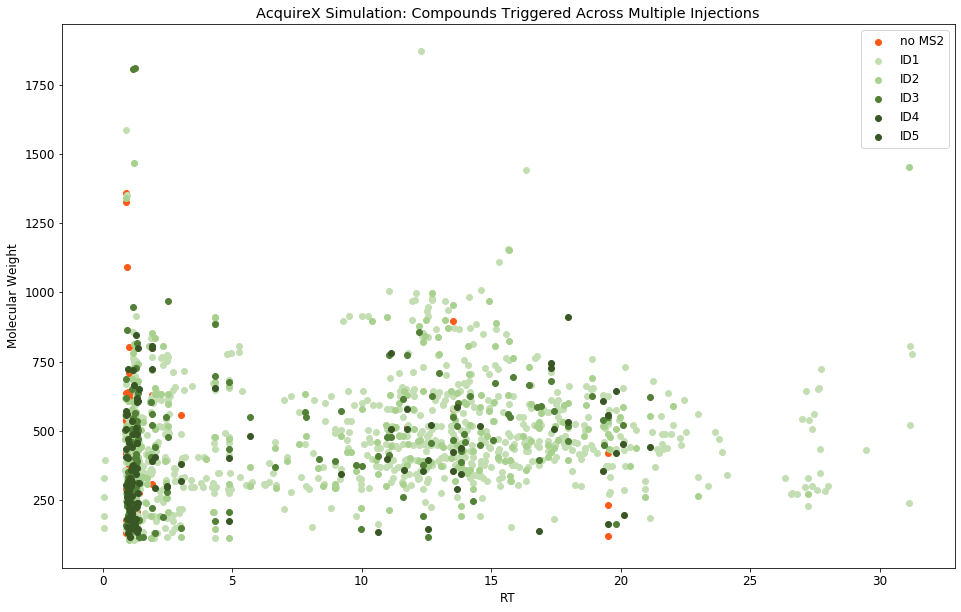

In [129]:
plt.figure(figsize=(16, 10))
plt.scatter(inj0[0], inj0[1], color=(1, 0.35, 0.1), label='no MS2')
plt.scatter(inj1[0], inj1[1], color=(0.77, 0.87, 0.7), label='ID1')
plt.scatter(inj2[0], inj2[1], color=(0.66, 0.82, 0.56), label='ID2')
plt.scatter(inj3[0], inj3[1], color=(0.32, 0.5, 0.21), label='ID3')
plt.scatter(inj4[0], inj4[1], color=(0.22, 0.34, 0.14), label='ID4')
plt.scatter(inj5[0], inj5[1], color=(0.22, 0.34, 0.14), label='ID5')
plt.ylabel('Molecular Weight')
plt.xlabel('RT')
plt.title('AcquireX Simulation: Compounds Triggered Across Multiple Injections')
plt.legend()
# plt.show()

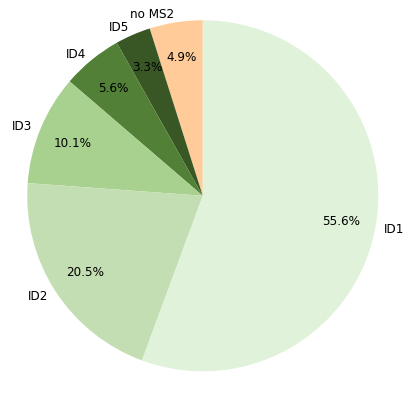

In [130]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'no MS2', 'ID5', 'ID4', 'ID3', 'ID2', 'ID1', 
sizes = [coverage(inj0), coverage(inj5), coverage(inj4), coverage(inj3), coverage(inj2), coverage(inj1)]
colours = [(1, 0.8, 0.6), (0.22, 0.34, 0.14), (0.32, 0.5, 0.21),  (0.66, 0.82, 0.56), (0.77, 0.87, 0.7), (0.88, 0.95, 0.85)]

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes,  labels=labels, colors=colours ,autopct='%1.1f%%',
        shadow=False, startangle=90, labeldistance=1.05, pctdistance=0.8)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.rcParams['font.size'] = 12
plt.show()